Data Reading - Image

    · cv2.IMREAD_COLOR: Colorful image
    · cv2.IMREAD_GRAYSCALE: Grayscale image

In [21]:
import cv2 #The color format read by opencv is BGR
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
# load image
img001 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg')

In [23]:
# currently it is h,w,c three-dimensional image
img001 

array([[[255, 255, 250],
        [255, 255, 251],
        [255, 254, 251],
        ...,
        [251, 250, 246],
        [254, 251, 247],
        [246, 243, 239]],

       [[242, 233, 229],
        [242, 233, 229],
        [246, 237, 233],
        ...,
        [252, 249, 245],
        [253, 248, 245],
        [255, 253, 250]],

       [[172, 158, 152],
        [168, 154, 148],
        [170, 156, 150],
        ...,
        [185, 178, 175],
        [186, 179, 176],
        [182, 175, 172]],

       ...,

       [[162, 150, 150],
        [161, 149, 149],
        [163, 149, 150],
        ...,
        [143, 127, 121],
        [144, 125, 120],
        [143, 124, 119]],

       [[163, 151, 149],
        [164, 152, 150],
        [164, 150, 151],
        ...,
        [141, 125, 119],
        [142, 125, 122],
        [142, 125, 122]],

       [[166, 155, 151],
        [164, 153, 149],
        [166, 152, 153],
        ...,
        [142, 126, 120],
        [143, 126, 123],
        [142, 125, 122]]

In [24]:
# image display can also create multiple windows
cv2.imshow('img001', img001)
# waiting time, millisecond level, 0 means any key to terminate
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# define a image show function
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [26]:
img001.shape

(720, 720, 3)

In [27]:
img001_gray = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg', cv2.IMREAD_GRAYSCALE)
# It becomes a two-dimensional image of h and w
img001_gray

array([[254, 255, 254, ..., 249, 250, 242],
       [233, 233, 237, ..., 248, 248, 253],
       [158, 154, 156, ..., 178, 179, 175],
       ...,
       [151, 150, 151, ..., 127, 126, 125],
       [152, 153, 152, ..., 125, 126, 126],
       [155, 153, 154, ..., 126, 127, 126]], dtype=uint8)

In [28]:
img001_gray.shape

(720, 720)

In [29]:
cv_show('img001_gray', img001_gray)

In [30]:
# save image
cv2.imwrite('C:/Computer_Vision/OpenCV-Python/references/img001_gray.jpg', img001_gray)

True

In [31]:
# image underlying type
type(img001_gray)

numpy.ndarray

In [32]:
img001_gray.size

518400

In [33]:
img001_gray.dtype

dtype('uint8')

Data Reading - Video

    · cv2.VideoCapture: Can capture the camera and use numbers to control different devices, such as 0 and 1.
    · If it is a video file, just specify the path directly.

In [34]:
# load video
vc = cv2.VideoCapture('C:/Computer_Vision/OpenCV-Python/references/video.mp4')

In [35]:
# Check if the video capture object is opened correctly
if vc.isOpened():
    openvc, frame = vc.read()
else:
    open = False

In [36]:
while open:
    ret, frame = vc.read()
    if frame is None:
        break
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('result', gray)
        if cv2.waitKey(10) & 0xFF == 27:
            break
vc.release()
cv2.destroyAllWindows()

Capture part of the image data

In [37]:
img002 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img002.jpg')
# cut out the part of the image you like
img2 = img002[200:900, 200:750]
cv_show('img2', img2)

Color channel extraction

In [38]:
b, g, r = cv2.split(img2)

In [39]:
b

array([[ 55,  67,  66, ..., 254, 255, 253],
       [ 57,  74,  76, ..., 255, 255, 255],
       [ 58,  77,  83, ..., 238, 240, 242],
       ...,
       [204, 204, 205, ..., 225, 224, 224],
       [202, 203, 203, ..., 225, 224, 224],
       [201, 201, 202, ..., 225, 224, 224]], dtype=uint8)

In [40]:
b.shape

(700, 550)

In [41]:
g

array([[ 55,  65,  62, ..., 248, 248, 246],
       [ 59,  74,  74, ..., 249, 249, 249],
       [ 63,  80,  85, ..., 232, 233, 235],
       ...,
       [200, 200, 201, ..., 219, 218, 218],
       [198, 199, 199, ..., 219, 218, 218],
       [197, 197, 198, ..., 219, 218, 218]], dtype=uint8)

In [42]:
r

array([[ 43,  54,  51, ..., 229, 229, 227],
       [ 47,  62,  63, ..., 230, 230, 230],
       [ 48,  65,  73, ..., 213, 214, 216],
       ...,
       [219, 219, 220, ..., 220, 219, 219],
       [217, 218, 218, ..., 220, 219, 219],
       [216, 216, 217, ..., 220, 219, 219]], dtype=uint8)

In [43]:
img2 = cv2.merge((r, g, b))
img2.shape

(700, 550, 3)

In [44]:
cv_show('img2', img2)

In [45]:
# only keep R
cur_img2 = img2.copy()
cur_img2[:, :, 0] = 0 # Set the blue channel to zero
cur_img2[:, :, 1] = 0 # Set the green channel to zero
cv_show('R', cur_img2) # Display the resulting image with only the red channel, with the title 'R'

In [46]:
# only keep G
cur_img2 = img2.copy()
cur_img2[:, :, 0] = 0 # Set the blue channel to zero
cur_img2[:, :, 2] = 0 # Set the red channel to zero
cv_show('G', cur_img2) # Display the resulting image with only the green channel, with the title 'G'

In [47]:
# only keep B
cur_img2 = img2.copy()
cur_img2[:, :, 1] = 0 # Set the green channel to zero
cur_img2[:, :, 2] = 0 # Set the red channel to zero
cv_show('B', cur_img2) # Display the resulting image with only the blue channel, with the title 'B'

Border Padding

    · BORDER_REPLICATE：Copy method, that is, copy the edge pixels
    · BORDER_REFLECT：Reflection method, copy the pixels in the image of interest on both sides, such as fedcba|abcdefgh|hgfedcb
    · BORDER_REFLECT_101：Reflection method, which is symmetrical with the edge pixel as the axis, such as gfedcba|abcdefgh|gfedcba
    · BORDER_WRAP：Outer wrapping method, such as cdefgh|abcdefgh|gfedcba
    · BORDER_CONSTANT：Constant method, constant value filling

In [48]:
# defines the sizes of the borders to be added to the image
top_size, bottom_size, left_size, right_size = (100, 100, 100, 100)
replicate = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img2, top_size, bottom_size, left_size, right_size, borderType = cv2.BORDER_CONSTANT, value = 0)

(<Axes: title={'center': 'CONSTANT'}>,
 Text(0.5, 1.0, 'CONSTANT'))

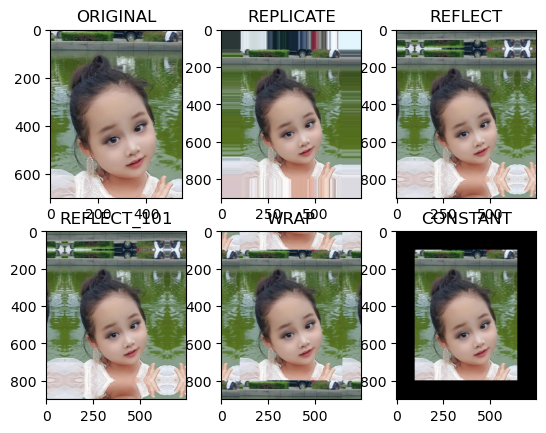

In [49]:
plt.subplot(231), plt.imshow(img2, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')


Numeral Calculations

In [50]:
img_2 = img2 + 10
# selects the first 5 rows (:5) of all columns (:) in the blue channel ([:, :, 0]) of the img_002 image.
img_2[:5, :, 0]

array([[ 53,  64,  61, ..., 239, 239, 237],
       [ 57,  72,  73, ..., 240, 240, 240],
       [ 58,  75,  83, ..., 223, 224, 226],
       [ 63,  73,  83, ..., 200, 201, 202],
       [ 71,  69,  79, ..., 186, 187, 187]], dtype=uint8)

In [51]:
img_2[:5, :, 0]

array([[ 53,  64,  61, ..., 239, 239, 237],
       [ 57,  72,  73, ..., 240, 240, 240],
       [ 58,  75,  83, ..., 223, 224, 226],
       [ 63,  73,  83, ..., 200, 201, 202],
       [ 71,  69,  79, ..., 186, 187, 187]], dtype=uint8)

In [52]:
# if it exceeds 255, take the remainder after subtracting 255.
(img2 + img_2)[:5, :, 0]

array([[ 96, 118, 112, ..., 212, 212, 208],
       [104, 134, 136, ..., 214, 214, 214],
       [106, 140, 156, ..., 180, 182, 186],
       [116, 136, 156, ..., 134, 136, 138],
       [132, 128, 148, ..., 106, 108, 108]], dtype=uint8)

In [53]:
# if it exceeds 255, take 255
cv2.add(img2, img_2)[:5, :, 0]

array([[ 96, 118, 112, ..., 255, 255, 255],
       [104, 134, 136, ..., 255, 255, 255],
       [106, 140, 156, ..., 255, 255, 255],
       [116, 136, 156, ..., 255, 255, 255],
       [132, 128, 148, ..., 255, 255, 255]], dtype=uint8)

图像融合

In [54]:
# the shape values ​​are inconsistent and addition cannot be performed
img001 + img2

ValueError: operands could not be broadcast together with shapes (720,720,3) (700,550,3) 

In [55]:
img001.shape

(720, 720, 3)

In [56]:
img2.shape

(700, 550, 3)

In [57]:
img2 = cv2.resize(img2, (720, 720))
img2.shape

(720, 720, 3)

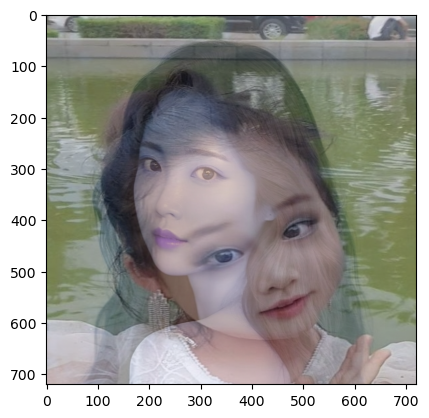

In [58]:
# display the resulting blended image
res = cv2.addWeighted(img001, 0.4, img2, 0.6, 0)
plt.imshow(res)

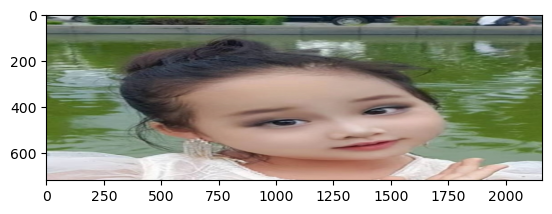

In [59]:
res = cv2.resize(img2, (0, 0), fx = 3, fy = 1)
plt.imshow(res)

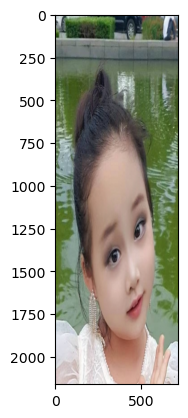

In [60]:
res = cv2.resize(img2, (0, 0), fx = 1, fy = 3)
plt.imshow(res)

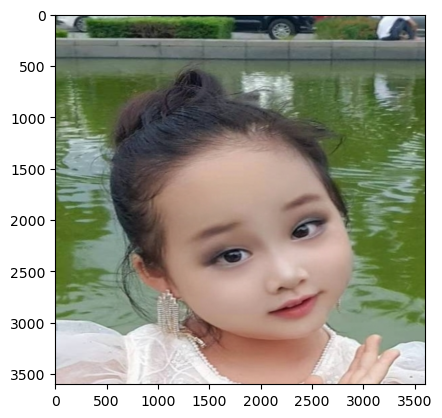

In [61]:
res = cv2.resize(img2, (0, 0), fx = 5, fy = 5)
plt.imshow(res)

Morphology

    · Erosion operations
    · Expansion operation
    · Opening and closing operations
    · Gradient operation
    · Top hat and black hat
    · Corrosion operations and expansion operations are inverse operations of each other

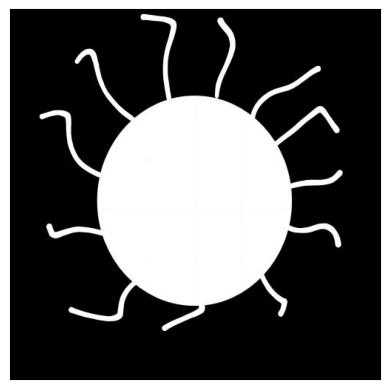

In [62]:
img = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/circle.jpg')
#cv_show('img', img)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

Erosion operations

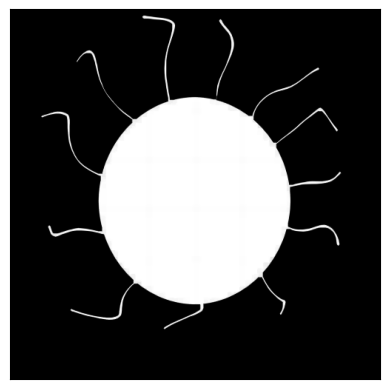

In [63]:
kernel = np.ones((5, 5), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
#cv_show('erosion', erosion)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
plt.show()

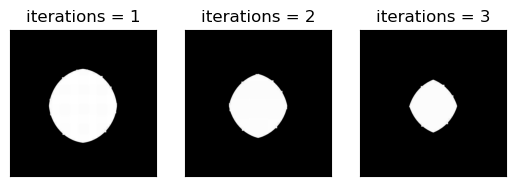

In [64]:
kernel = np.ones((30, 30), np.uint8) #腐蚀操作
erosion1 = cv2.erode(img, kernel, iterations = 1)
erosion2 = cv2.erode(img, kernel, iterations = 2)
erosion3 = cv2.erode(img, kernel, iterations = 3)
#res = np.hstack((erosion1, erosion2, erosion3))
#cv_show('res', res)
plt.subplot(131), plt.imshow(erosion1), plt.title('iterations = 1')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(erosion2), plt.title('iterations = 2')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(erosion3), plt.title('iterations = 3')
plt.xticks([]), plt.yticks([])
plt.show()

Dilate operation

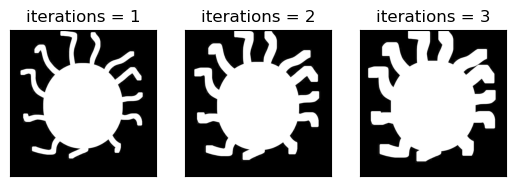

In [65]:
kernel = np.ones((10,10), np.uint8) #膨胀处理
dilate1 = cv2.dilate(img, kernel, iterations = 1)
dilate2 = cv2.dilate(img, kernel, iterations = 2)
dilate3 = cv2.dilate(img, kernel, iterations = 3)
#res = np.hstack((dilate1, dilate2, dilate3))
#cv_show('res', res)
plt.subplot(131), plt.imshow(dilate1), plt.title('iterations = 1')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilate2), plt.title('iterations = 2')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(dilate3), plt.title('iterations = 3')
plt.xticks([]), plt.yticks([])
plt.show()

Opening and closing operations

In [66]:
# open: Corrosion first, then expansion
kernel = np.ones((7,7), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#cv_show('opening', opening)

In [68]:
# closed: expand first, then corrode
kernel = np.ones((10,10), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#cv_show('closing', closing)

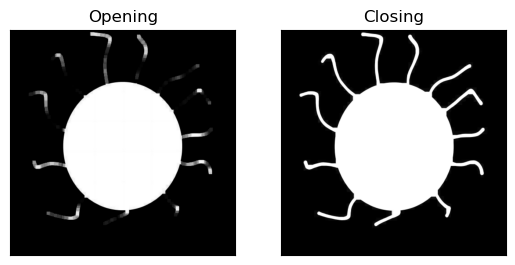

In [69]:
plt.subplot(121), plt.imshow(opening), plt.title('Opening')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closing), plt.title('Closing')
plt.xticks([]), plt.yticks([])
plt.show()

Gradient operation

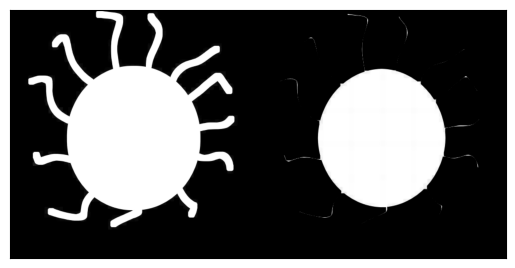

In [70]:
# gradient = dilation - erosion
kernel = np.ones((3,3), np.uint8)
dilate = cv2.dilate(img, kernel, iterations = 3) # dilation
erosion = cv2.erode(img, kernel, iterations = 3) # erosion
res = np.hstack((dilate, erosion))
#cv_show('res', res)
plt.imshow(res)
plt.xticks([]), plt.yticks([])
plt.show()

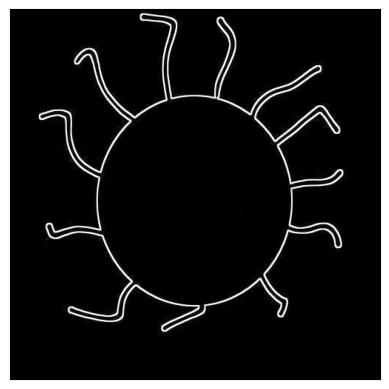

In [71]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#cv_show('gradient', gradient)
plt.imshow(gradient)
plt.xticks([]), plt.yticks([])
plt.show()

Top hat and black hat

  · top hat = original input - result of open operation
  · black hat = closed operation - original input

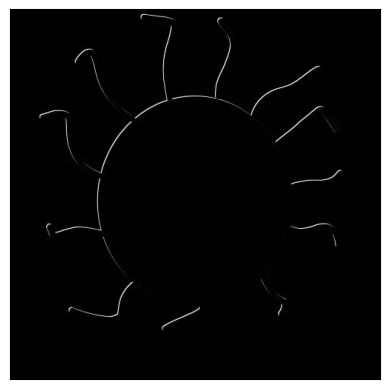

In [72]:
# top hat
kernel = np.ones((2,2), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#cv_show('opening', opening)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
#cv_show('tophat', tophat)
plt.imshow(tophat)
plt.xticks([]), plt.yticks([])
plt.show()

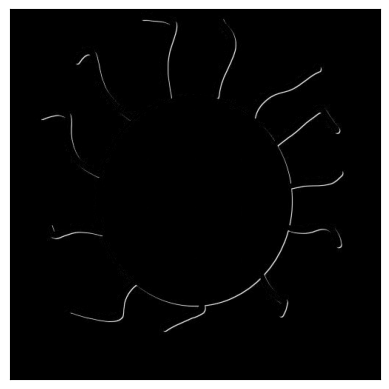

In [73]:
# black hat
kernel = np.ones((2,2), np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#cv_show('opening', opening)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
#cv_show('blackhat', blackhat)
plt.imshow(blackhat)
plt.xticks([]), plt.yticks([])
plt.show()

Image gradient

    · dst = cv2.Sobel(src, ddepth, dx, dy, ksize)
    · dx and dy represent the horizontal and vertical directions respectively
    · ksize is the size of the Sobel operator
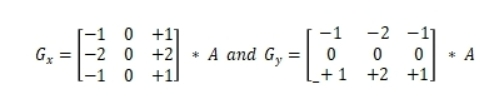

    · Horizontal direction：P5 = (P3 - P1) + 2 x (P6 - P4) + (P9 - P7)
    · Vertical direction：P5 = (P7 - P1) + 2 x (P8 - P2) + (P9 - P3)
    · In the horizontal direction, P4 and P6 are closer to P5, so they are given greater weight. In the vertical direction, P2 and P8 are closer to P5, so the weight based on them is larger.

 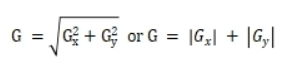

    · Sobel operator子 = |left - right| or |bottom - top|
    · Scharr operator = |left - right| or |bottom - top|
    · Laplacian operator = |center - left| + |center - right| + |center - lower| + |center - upper|
  
The Scharr operator has the same speed as the Sobel operator and has higher accuracy. It is an improved version of Sobel operator.

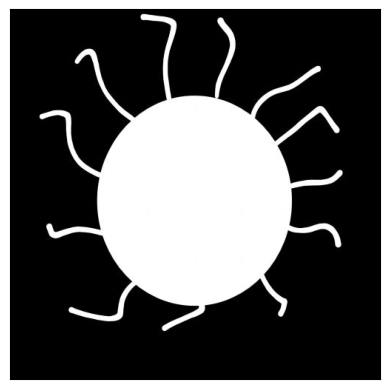

In [74]:
pie = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/circle.jpg', cv2.IMREAD_GRAYSCALE)
plt.xticks([]), plt.yticks([])
plt.imshow(pie, cmap = 'gray') # Converted color channels of opencv to matplotlib 
plt.show()

In [75]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize = 3) #CV_64F refers to 64-bit floating-point data type.
cv_show('sobelx', sobelx)
# White to black is a positive number, black to white is a negative number. All negative numbers will be truncated to 0, so the absolute value must be taken.
# plt.xticks([]), plt.yticks([])
# plt.imshow(cv2.cvtColor(sobelx, cv2.COLOR_BGR2RGB))
# plt.show()

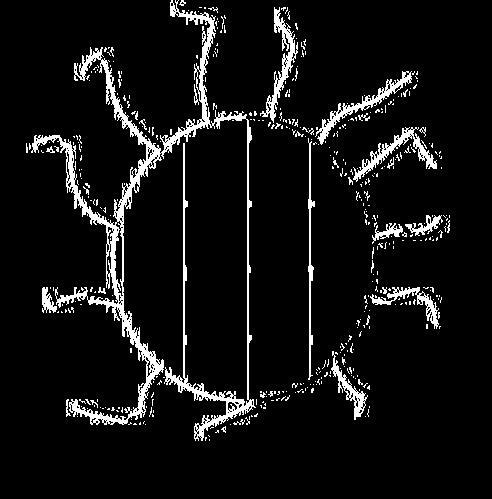

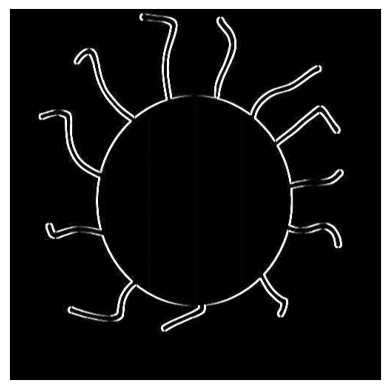

In [76]:
sobelx = cv2.Sobel(pie, cv2.CV_64F, 1, 0, ksize = 3) # cv2.CV_64F is for absolute value
sobelx = cv2.convertScaleAbs(sobelx)
#cv_show('sobelx', sobelx)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelx, cmap = 'gray')
plt.show()

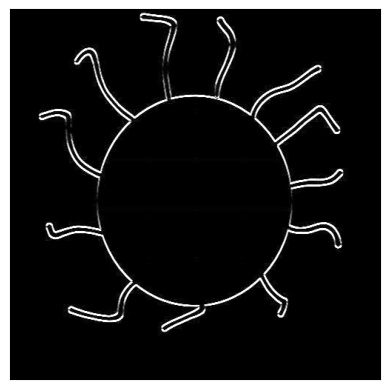

In [77]:
sobely = cv2.Sobel(pie, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
#cv_show('sobely', sobely)
plt.xticks([]), plt.yticks([])
plt.imshow(sobely, cmap = 'gray')
plt.show()

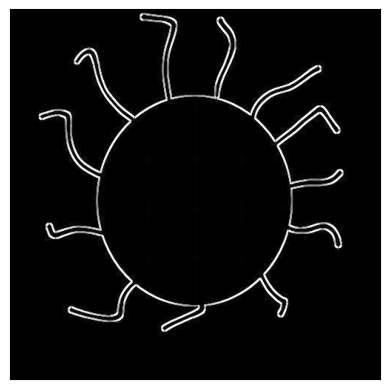

In [78]:
# calculate x and y separately, then sum two of them
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
#cv_show('sobelxy', sobelxy)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

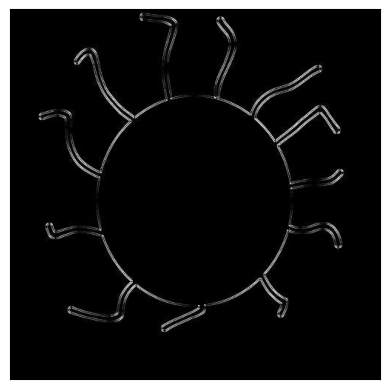

In [79]:
# it is not recommended to calculate directly as it may affect the effect.
sobelxy = cv2.Sobel(pie, cv2.CV_64F,1,1,ksize = 3)
sobelxy = cv2.convertScaleAbs(sobelxy)
#cv_show('sobelxy', sobelxy)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

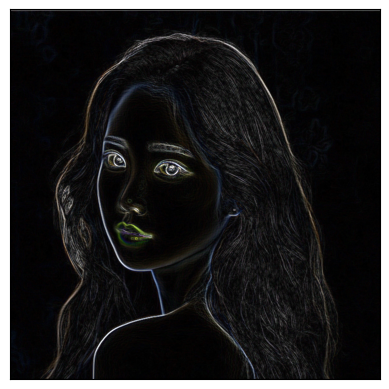

In [82]:
sobelx = cv2.Sobel(img001, cv2.CV_64F, 1, 0, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.Sobel(img001, cv2.CV_64F, 0, 1, ksize = 3)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
#cv_show('sobelxy', sobelxy)
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

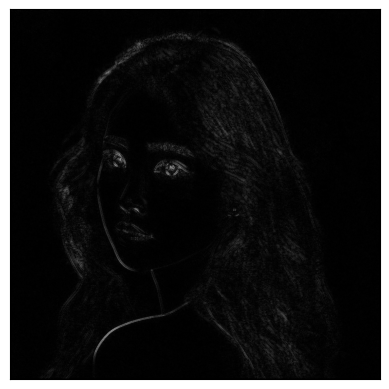

In [83]:
img1 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img001.jpg', cv2.IMREAD_GRAYSCALE)
sobelxy = cv2.Sobel(img1, cv2.CV_64F, 1, 1, ksize = 3)
sobelxy = cv2.convertScaleAbs(sobelxy)
#cv_show('sobelxy', sobelxy)
# this part should differ from the pictures added separately in the previous part.
plt.xticks([]), plt.yticks([])
plt.imshow(sobelxy, cmap = 'gray')
plt.show()

Image gradient - Scharr operator

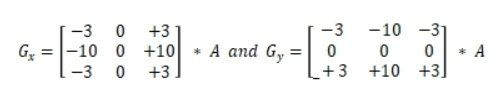

Image gradient - Laplacian operator

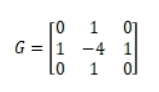

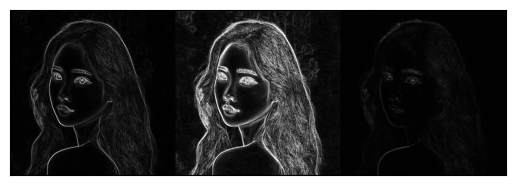

In [84]:
# the differences between different operators

#Sobel operator
sobelx = cv2.Sobel(img1, cv2.CV_64F, 1, 0, ksize = 3)
sobely = cv2.Sobel(img1, cv2.CV_64F, 0, 1, ksize = 3)
sobelx = cv2.convertScaleAbs(sobelx)
sobely = cv2.convertScaleAbs(sobely)
sobelxy = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0)

#Scharr operator
scharrx = cv2.Scharr(img1, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img1, cv2.CV_64F, 0, 1)
scharrx = cv2.convertScaleAbs(scharrx)
scharry = cv2.convertScaleAbs(scharry)
scharrxy = cv2.addWeighted(scharrx, 0.5, scharry, 0.5, 0)

#Laplacian operator
laplacian = cv2.Laplacian(img1, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

# Sobel seems to have the best effect at present, but Scharr is an upgraded version of Sobel. Choose the best one according to the image.
# The Laplacian operator simplifies the algorithm, but the effect is not outstanding and is usually used together with other tools.
res = np.hstack((sobelxy, scharrxy, laplacian))
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(res, cmap = 'gray')
plt.show()

Image smoothing

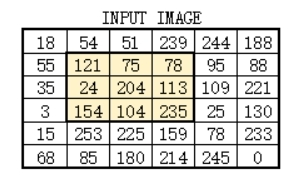

In [85]:
def add_salt_and_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    """
    Add salt and pepper noise to the image.
    """
    noisy_image = image.copy()
    row, col, ch = noisy_image.shape
    # Salt noise
    salt = np.random.rand(row, col, ch) < salt_prob
    noisy_image[salt] = 255
    # Pepper noise
    pepper = np.random.rand(row, col, ch) < pepper_prob
    noisy_image[pepper] = 0
    return noisy_image

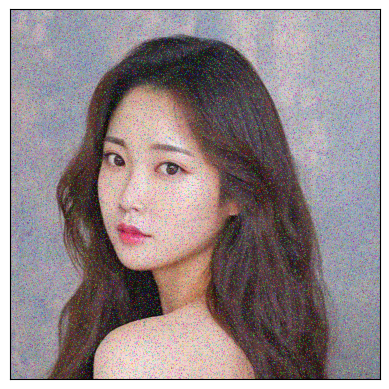

In [86]:
# Add salt and pepper noise
img_noisy = add_salt_and_pepper_noise(img001)
#cv_show('img_noisy', img_noisy)
# Save the noisy image to a file
cv2.imwrite('C:/Computer_Vision/OpenCV-Python/references/img_noisy.jpg', img_noisy)
# Display the original and noisy images
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(img_noisy, cv2.COLOR_BGR2RGB))
plt.show()

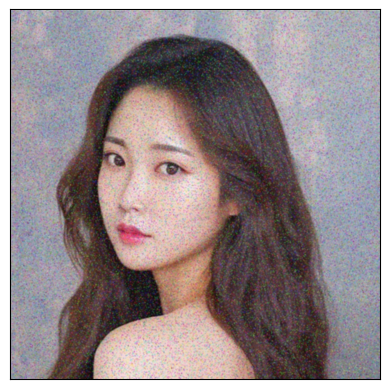

In [87]:
img_noisy = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/img_noisy.jpg')
# Mean filter: Simple average convolution operation
blur = cv2.blur(img_noisy, (3,3))
#cv_show('blur', blur)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
plt.show()

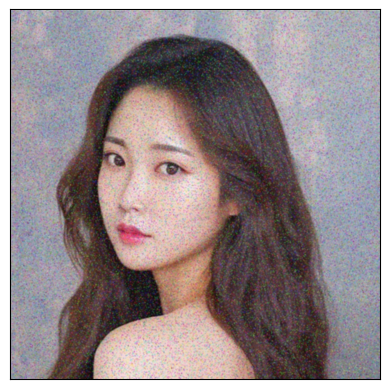

In [88]:
# Box filter: Basically the same as mean, you can choose normalization
box = cv2.boxFilter(img_noisy, -1, (3,3), normalize = True)
# If "normalize = True" in box filtering, it is exactly the same as mean filtering, so this section is actually the same as the previous section.
#cv_show('box', box)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
plt.show()

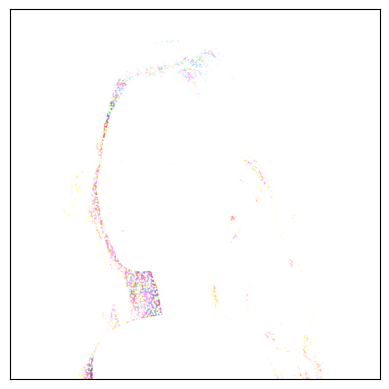

In [89]:
# Box filter: Basically the same as mean, you can choose normalization
# "normalize = False" is different from previous part
box = cv2.boxFilter(img_noisy, -1, (3,3), normalize = False)
#cv_show('box', box)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(box, cv2.COLOR_BGR2RGB))
plt.show()

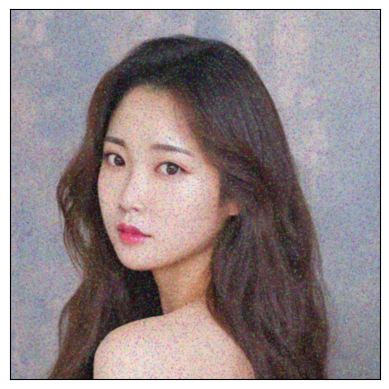

In [91]:
# Gaussian filter: The values ​​in the convolution kernel of Gaussian blur satisfy the Gaussian distribution, which is equivalent to paying more attention to the middle
gaussian = cv2.GaussianBlur(img_noisy, (5,5), 1)
#cv_show('gaussian', gaussian)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB))
plt.show()

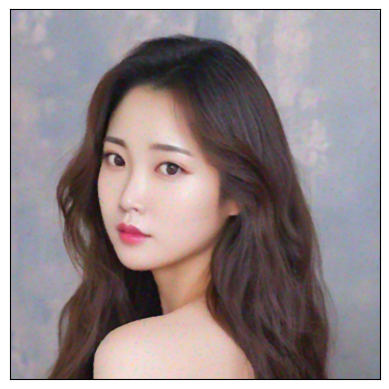

In [92]:
# Median filter: Equivalent to using the median instead
median = cv2.medianBlur(img_noisy, 5) #指定完滤波器大小，然后选取中间值代替
#cv_show('median', median)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Show all filtering effects
res = np.hstack((cv2.cvtColor(blur, cv2.COLOR_BGR2RGB), cv2.cvtColor(gaussian, cv2.COLOR_BGR2RGB), cv2.cvtColor(median, cv2.COLOR_BGR2RGB)))
#print(res)
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(res)
plt.show()

Image threshold

    · res,dst = cv2.threshold(src, thresh, maxval, type)
    · src: Input image, only single-channel images can be input, usually grayscale images
    · dst: Output image
    · thresh: Thresh
    · maxval: When the pixel value exceeds the threshold (or is less than the threshold, depending on the type), the value assigned
    · type: Types of binary operations, including the following 5 types: cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_TRUNC,cv2.THRESH_TOZERO,cv2.THRESH_TOZERO_INV
  
      · cv2.THRESH_BINARY: Take maxval (maximum value) for the part that exceeds the threshold, otherwise take 0
      · cv2.THRESH_BINARY_INV: The inversion of THRESH_BINARY
      · cv2.THRESH_TRUNC: The part greater than the threshold is set to the threshold, otherwise it remains unchanged.
      · cv2.THRESH_TOZERO: The part greater than and does not change, otherwise set to 0
      · cv2.THRESH_TOZERO_INV: The inversion of THRESH_TOZERO

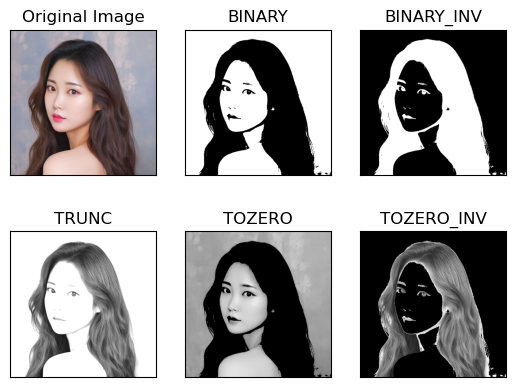

In [93]:
ret, thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img1, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [cv2.cvtColor(img001, cv2.COLOR_BGR2RGB), thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

Canny edge detection

    · 1） Use Gaussian filter to smooth the image and filter out noise.
    · 2） Calculate the gradient intensity and direction of each pixel in the image.
    · 3） Apply non-maximum suppression to eliminate spurious responses due to edge detection.
    · 4） Apply double threshold detection to determine actual and potential edges.
    · 5） By suppressing isolated weak edges, edge detection is finally completed.

1.Gaussian filter

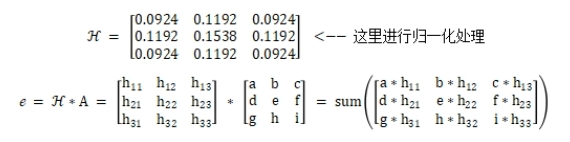

2.Gradient and direction

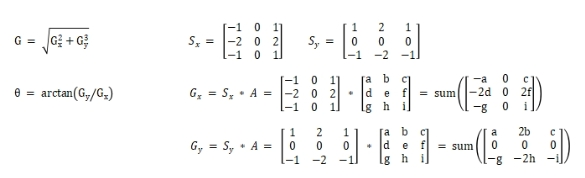

3.Non-maximum suppression

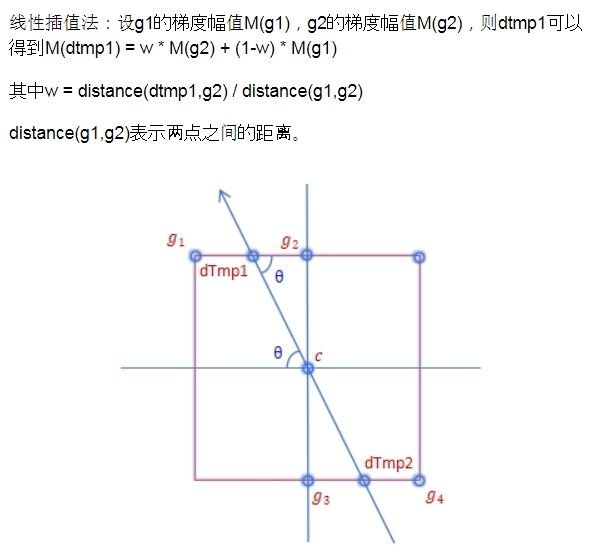

In order to simplify the calculation, since there are eight pixels around a pixel, the gradient direction of a pixel is discretized into eight directions, so that only the front and back can be calculated without interpolation.

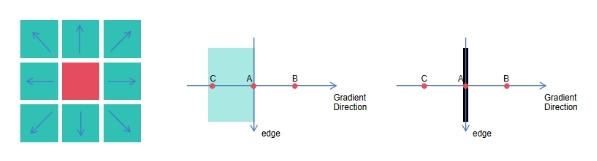

4. Double threshold detection

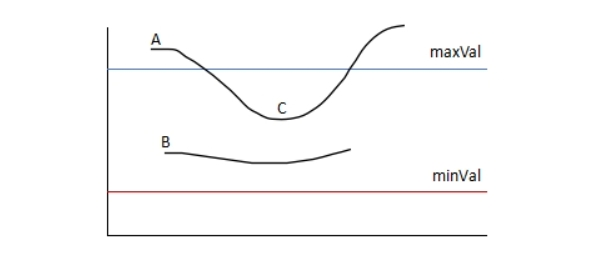

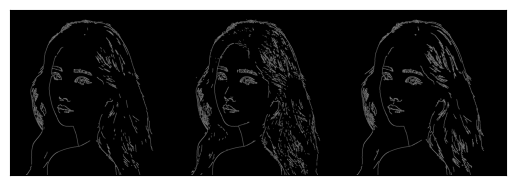

In [94]:
v1 = cv2.Canny(img1, 80, 150)
v2 = cv2.Canny(img1, 80, 100)
v3 = cv2.Canny(img1, 50, 150)
res = np.hstack((v1, v2, v3))
#cv_show('res',res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))#改变了颜色通道
plt.show()

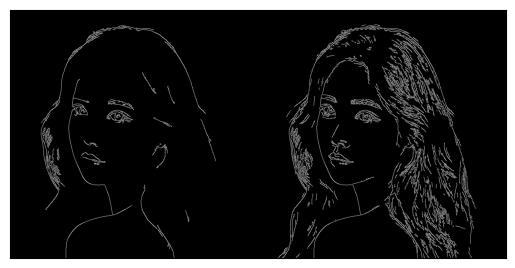

In [95]:
v1 = cv2.Canny(img1, 50, 250)
v2 = cv2.Canny(img1, 50, 100)
res = np.hstack((v1, v2))
#cv_show('res',res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))#改变了颜色通道
plt.show()

Image outline

cv2.findContours(img,mode,method)

mode: Contour retrieval mode

    · RETR_EXTERNAL: Only retrieve the outermost contour;
    · RETR_LIST: Retrieve all contours. and save it into a linked list;
    · RETR_CCOMP: Retrieve all contours and organize them into two layers: the top layer is the outer boundary of each part, and the second layer is the boundary of the cavity
    · RETR_TREE: Retrieve all contours and reconstruct the entire hierarchy of nested contours.

method: Contour approximation method

    · CHAIN_APPROX_NONE: Output contours in Freeman chain code, all other methods output polygons (sequences of vertices).
    · CHAIN_APPROX_SIMPLE: Compress the horizontal, vertical and oblique parts, that is, the function only retains their end points.

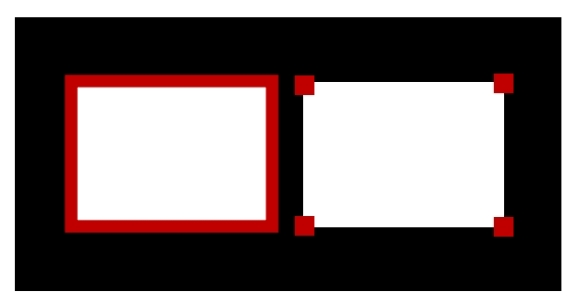

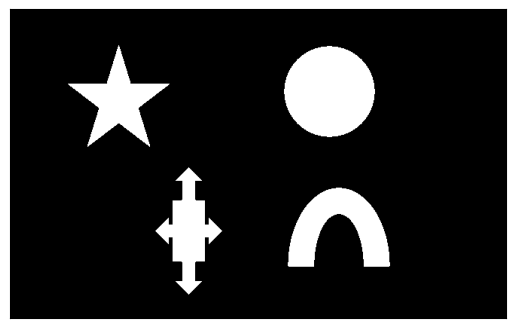

In [96]:
# For higher accuracy, use binary images.
imgs = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/imgs.png')
gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#cv_show('thresh', thresh)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

In [97]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) 
contours

(array([[[433, 237]],
 
        [[432, 238]],
 
        [[431, 238]],
 
        [[430, 238]],
 
        [[429, 238]],
 
        [[428, 238]],
 
        [[427, 238]],
 
        [[426, 239]],
 
        [[425, 239]],
 
        [[424, 239]],
 
        [[423, 239]],
 
        [[422, 240]],
 
        [[421, 240]],
 
        [[420, 240]],
 
        [[419, 241]],
 
        [[418, 241]],
 
        [[417, 242]],
 
        [[416, 242]],
 
        [[415, 243]],
 
        [[414, 243]],
 
        [[413, 244]],
 
        [[412, 244]],
 
        [[411, 245]],
 
        [[410, 246]],
 
        [[409, 246]],
 
        [[408, 247]],
 
        [[407, 248]],
 
        [[406, 249]],
 
        [[405, 249]],
 
        [[404, 250]],
 
        [[403, 251]],
 
        [[402, 252]],
 
        [[401, 253]],
 
        [[400, 254]],
 
        [[399, 255]],
 
        [[398, 256]],
 
        [[397, 257]],
 
        [[396, 258]],
 
        [[395, 259]],
 
        [[394, 260]],
 
        [[394, 261]],
 
        [[393, 2

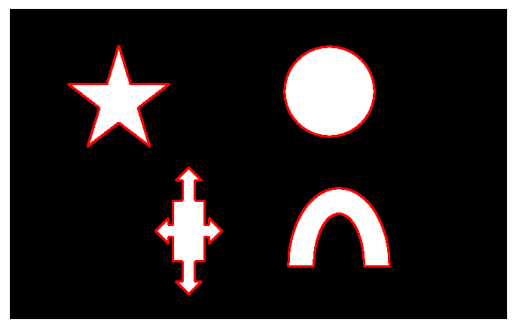

In [98]:
# Pass in the drawing image, outline, outline index, color mode, line thickness
# Note that a copy is required, otherwise the original image will change!!!
draw_img = imgs.copy()
res = cv2.drawContours(draw_img, contours, -1, (0, 0, 255), 2)
# -1 defaults to selecting all contours. If it is not -1, select the outer contour and inner contour one by one.
# (0, 0, 255) is BGR, which refers to red color channel here
# 2 is thickness. These values ​​can be changed.
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

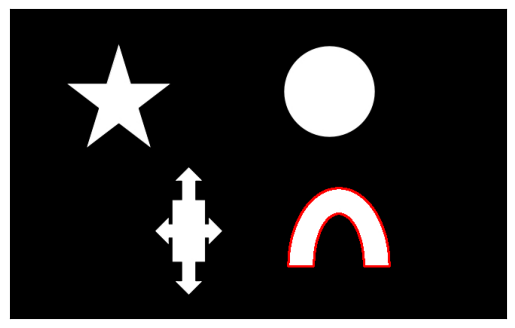

In [99]:
draw_img = imgs.copy()
res = cv2.drawContours(draw_img, contours, 0, (0, 0, 255), 2)
#cv_show('res', res)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

In [100]:
cnt = contours[0]

In [101]:
# area
cv2.contourArea(cnt)

7298.0

In [102]:
# perimeter, "True" means closed
cv2.arcLength(cnt,True)

530.1320307254791

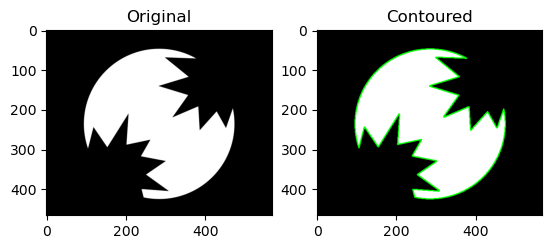

In [103]:
img0 = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/image.png')
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[0]
draw_img2 = img0.copy()
res = cv2.drawContours(draw_img2, [cnt], -1, (0, 255, 0), 2)
#cv_show('res',res)
plt.subplot(121), plt.imshow(cv2.cvtColor(img0, cv2.COLOR_BGR2RGB), 'gray'), plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), 'gray'), plt.title('Contoured')
plt.show()

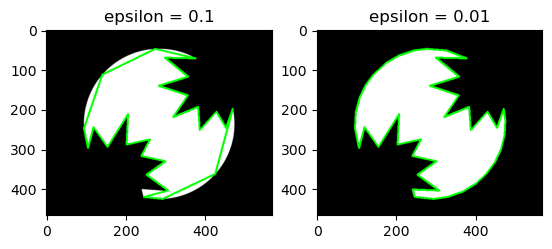

In [104]:
epsilon1 = 0.01 * cv2.arcLength(cnt, True)
epsilon2 = 0.001 * cv2.arcLength(cnt, True)
approx1 = cv2.approxPolyDP(cnt, epsilon1, True)
approx2 = cv2.approxPolyDP(cnt, epsilon2, True)
draw_img3 = img0.copy()
draw_img4 = img0.copy()
res1 = cv2.drawContours(draw_img3, [approx1], -1, (0, 255, 0), 3) # Made an approximation
res2 = cv2.drawContours(draw_img4, [approx2], -1, (0, 255, 0), 3)
#cv_show('res', res)
plt.subplot(121), plt.imshow(cv2.cvtColor(res1, cv2.COLOR_BGR2RGB), 'gray'), plt.title('epsilon = 0.1')
plt.subplot(122), plt.imshow(cv2.cvtColor(res2, cv2.COLOR_BGR2RGB), 'gray'), plt.title('epsilon = 0.01')
plt.show()

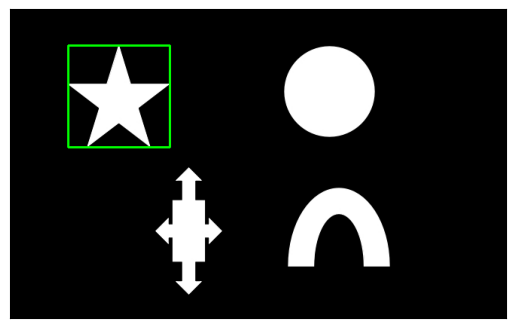

In [105]:
# rectangle
imgs = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/imgs.png')
gray = cv2.cvtColor(imgs, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# By changing this parameter, you can select the connecting rectangle of each image (also divided into inner and outer layers)
cnt = contours[3] 
x, y, w, h = cv2.boundingRect(cnt)
imgs1 = cv2.rectangle(imgs, (x, y), (x+w, y+h), (0, 255, 0), 2)
#cv_show('imgs1', imgs1)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(imgs1, cv2.COLOR_BGR2RGB))
plt.show()

In [106]:
area = cv2.contourArea(cnt)
x, y, w, h = cv2.boundingRect(cnt)
# (x, y) are the coordinates of the upper left corner of the rectangle, (w, h) are the width and height of the rectangle
rect_area = w * h
extent = float(area) / rect_area
print('Ratio of outline area to bounding rectangle area：',extent)

Ratio of outline area to bounding rectangle area： 0.323840877914952


Circumscribed circle

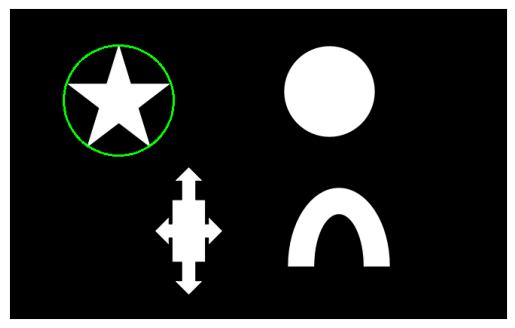

In [107]:
imgs = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/imgs.png')
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
imgs2 = cv2.circle(imgs, center,radius, (0,255,0), 2)
#v_show('imgs2', imgs2)
plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(imgs2, cv2.COLOR_BGR2RGB))
plt.show()

Template matching 

The principle of template matching is very similar to that of convolution. The template slides from the origin on the original image, and the degree of difference between the template and (the place where the image is covered by the template) is calculated. There are 6 ways to calculate the degree of difference in opencv, and then each time The calculated results are put into a matrix and output as the result. If the original graphic is of AxB size and the template is of axb size, the matrix of the output result is (A-a+1)x(B-b+1).

模板匹配和卷积原理很像，模板在原图像上从原点开始滑动，计算模板与(图像被模板覆盖的地方)的差别程度，这个差别程度的计算方法在opencv里有6种，然后将每次计算的结果放入一个矩阵里，作为结果输出。假如原图形是AxB大小，而模板是axb大小，则输出的结果的矩阵里是(A-a+1)x(B-b+1).


In [108]:
# template matching
template = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/face.png')
h, w = template.shape[:2]
img001.shape

(720, 720, 3)

In [109]:
template.shape

(374, 329, 3)

The template matching function in OpenCV is: matchTemplate(img,template,method)

Template matching calculation method (preferably using normalized parameters):

        · TM_SQDIFF calculates square differences. The smaller the calculated value, the more relevant it is.
        · TM_CCORR calculates correlation. The larger the calculated value, the more relevant it is.
        · TM_CCOEFF calculates the correlation coefficient. The larger the calculated value, the more relevant it is.
        · TM_SQDIFF_NORMED calculates the normalized square difference. The closer the calculated value is to 0, the more relevant it is.
        · TM_CCORR_NORMED calculates the normalized correlation. The closer the calculated value is to 1, the more relevant it is.
        · TM_CCOEFF_NORMED calculates the normalized correlation coefficient. The closer the calculated value is to 1, the more relevant it is.

It is recommended to use the method with normalization, the results will be more accurate.

In [110]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
          'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
# As can be seen from the output results below, the matching results of “TM_CCORR” are very poor.
res = cv2.matchTemplate(img001, template, cv2.TM_SQDIFF)
res.shape

(347, 392)

In [111]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
# minimum value, maximum value, coordinate position of the minimum value, coordinate position of the maximum value
# "min_loc" is the most important
min_val

5324086.0

In [112]:
max_val

5160586752.0

In [113]:
min_loc

(136, 138)

In [114]:
max_loc

(25, 322)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


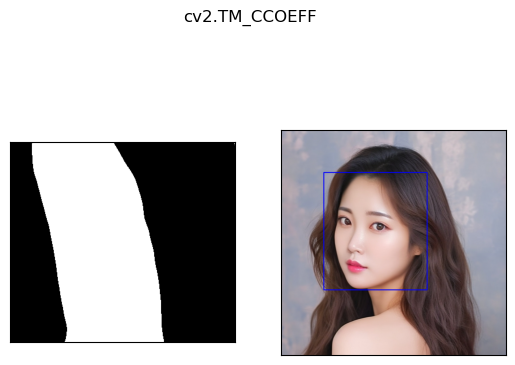

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


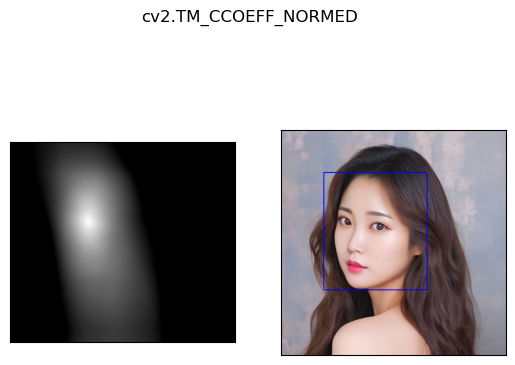

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


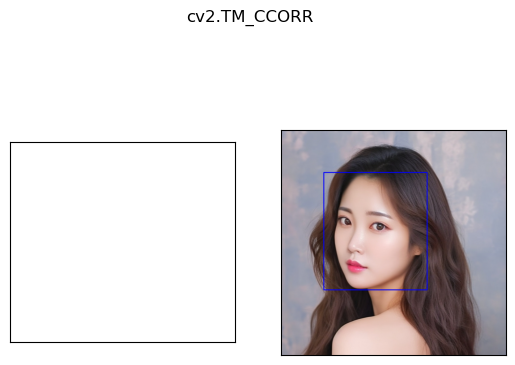

3


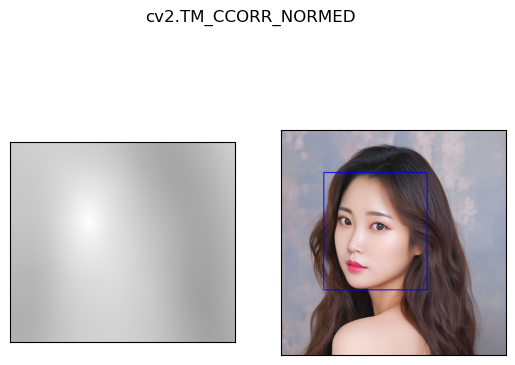

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


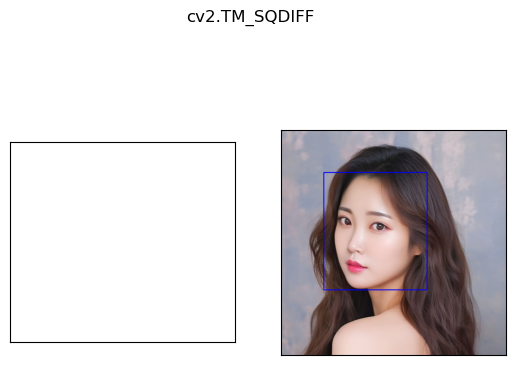

1


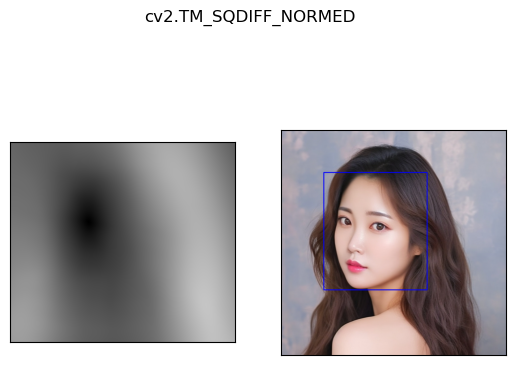

In [115]:
for meth in methods:
    img2 = img001.copy()
    # the truth value of the matching method
    method = eval(meth)
    print(method)
    res = cv2.matchTemplate(img001, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If it is squared difference matching 'TM_SQDIFF' or normalized squared difference matching 'TM_SQDIFF_NORMED', take the minimum value
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    # rectangle
    cv2.rectangle(img2, top_left, bottom_right, 255, 2)
    plt.subplot(121), plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.xticks([]), plt.yticks([]) 
    plt.subplot(122), plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB), cmap = 'gray')
    plt.xticks([]), plt.yticks([]) 
    plt.suptitle(meth)
    plt.show()

Match multiple objects

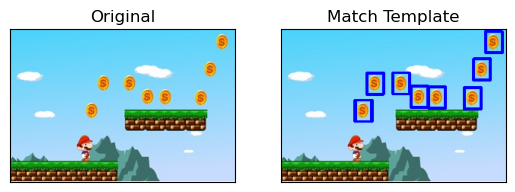

In [116]:
img_rgb = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/mario.png')
b, g, r = cv2.split(img_rgb)
img_rgb2 = cv2.merge([r, g, b])
img_gray = cv2.cvtColor(img_rgb2, cv2.COLOR_BGR2GRAY)
template = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/coin.png',0)
h, w = template.shape[:2]
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
# Get the coordinates with a matching degree greater than 80%
loc = np.where(res >= threshold) 
img_match = img_rgb2.copy()
for pt in zip(*loc[::-1]): # * indicates optional parameters
    bottom_right = ((pt[0]) + w, pt[1] + h)
    cv2.rectangle(img_match, pt, bottom_right, (0, 0, 255), 2)
#cv_show('img_rgb', img_rgb)
plt.subplot(121), plt.imshow(img_rgb2, 'gray'), plt.title('Original')
plt.xticks([]), plt.yticks([]) 
plt.subplot(122), plt.imshow(img_match, 'gray'), plt.title('Match Template')
plt.xticks([]), plt.yticks([])
plt.show()

Image pyramid

    · Gaussian Pyramid
    · Laplace's Pyramid

Gaussian represents "blur" and Laplacian represents "difference".

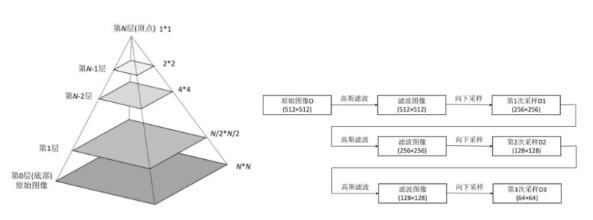

Gaussian Pyramid: Downsampling method (reduction, that is, going up is called downsampling)

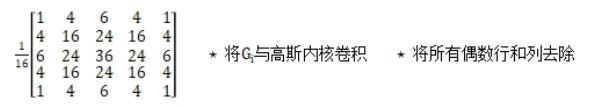

Gaussian Pyramid: Upsampling method (enlarging, that is, going down is called upsampling)

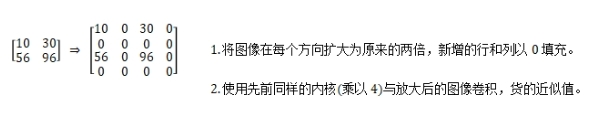

In [117]:
img_yueyetu = cv2.imread('C:/Computer_Vision/OpenCV-Python/references/cartoon.png')
# In order to avoid errors after Laplacian pyramid, the image is evenly resized here.
img_yueyetu = cv2.resize(img_yueyetu, (452, 372))
b, g, r = cv2.split(img_yueyetu)
img_yueyetu = cv2.merge([r, g, b])
print(img_yueyetu.shape)
#cv_show('img', img)

(372, 452, 3)


In [118]:
# upsampling
up = cv2.pyrUp(img_yueyetu)
#cv_show('up', up)
print(up.shape)

(744, 904, 3)


In [119]:
# downsampling
down = cv2.pyrDown(img_yueyetu)
#cv_show('down', down)
print(down.shape)

(186, 226, 3)


In [120]:
up2 = cv2.pyrUp(up)
#cv_show('up2', up2)
print(up2.shape)

(1488, 1808, 3)


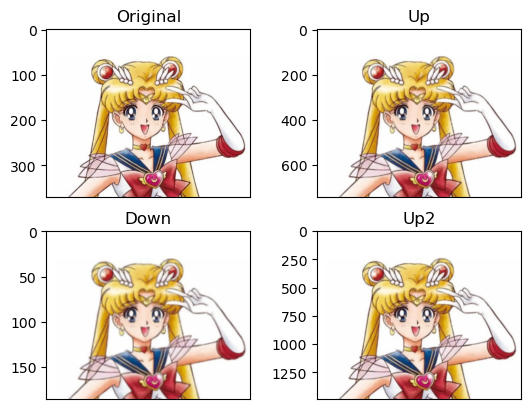

In [121]:
# Use cv2 to open it and you can see the size of the picture more intuitively.
plt.subplot(221), plt.imshow(img_yueyetu, 'gray'), plt.title('Original')
plt.xticks([])
plt.subplot(222), plt.imshow(up, 'gray'), plt.title('Up')
plt.xticks([])
plt.subplot(223), plt.imshow(down, 'gray'), plt.title('Down')
plt.xticks([])
plt.subplot(224), plt.imshow(up2, 'gray'), plt.title('Up2')
plt.xticks([])
plt.show()
# Pay attention to the changes in the y-axis ruler (the x-axis ruler is hidden)

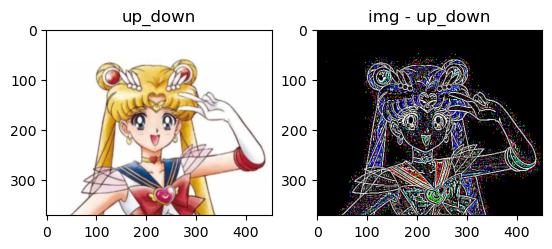

In [123]:
# Do upsampling once, and do downsampling again. Due to data loss, the following figure is produced.
up3 = cv2.pyrUp(img_yueyetu)
up_down = cv2.pyrDown(up)
#cv_show('img-up_down', img-up_down)
plt.subplot(121), plt.imshow(up_down, 'gray'), plt.title('up_down')
plt.subplot(122), plt.imshow(img_yueyetu - up_down, 'gray'), plt.title('img - up_down')
plt.show()
# 'img - up_down' is the part of the data that was lost

Laplace's Pyramid

    · 1. Low pass filtering
    · 2. Reduce size
    · 3. Enlarge size
    · 4. Image subtraction

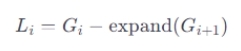

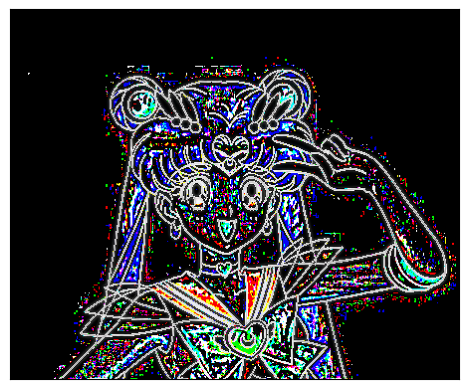

In [125]:
down2 = cv2.pyrDown(img_yueyetu)
down_up = cv2.pyrUp(down2)
#img.shape
#down_up.shape
# Since the image shape is an odd number, the size shape of the Laplacian pyramid changes during the down and up processes, so a step of resizing the image to an even number is added at the beginning.
lap = img_yueyetu - down_up
plt.xticks([]), plt.yticks([])
plt.imshow(lap)
plt.show()